<a href="https://colab.research.google.com/github/caroidarraga/Aprendizaje_No_Supervisado/blob/main/M%C3%A9todos_de_clustering_basados_en_particiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
digits = load_digits()
digits.data.shape
#El resultado es el número de imagenes y el número de pixel (8 filas x8 columnas, hemos hecho un flatten)


(1797, 64)

Vamos a ver algunos ejemplos de clustering con K-means.

En el primer ejemplo, vamos a intentar clusterizar un dataset de números. Este dataset consiste en 1797 imágenes (ejemplos/instancias) con 64 atributos (características/variables/*features*), donde cada una de esos 64 atributos es la intensidad de un pixel de una imagen en escala de grises de 8x8:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png">

# VC02 - Métodos de clustering basados en particiones

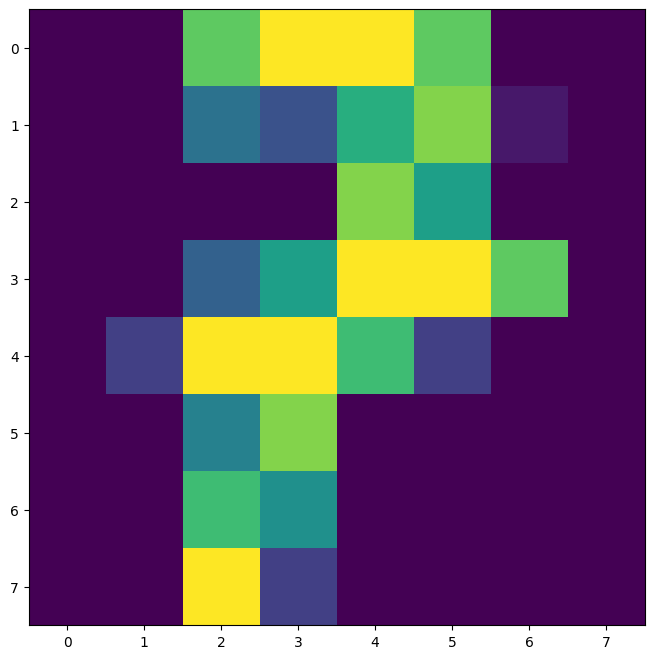

(<matplotlib.image.AxesImage at 0x7f4be6705870>, None)

In [2]:
plt.imshow(digits.data[1200].reshape((8,8))), plt.show()

In [6]:
# utilizamos k-means para hacer el clustering

Kmeans = KMeans(n_clusters=10, random_state=0)
clusters=Kmeans.fit_predict(digits.data)

#La dimensión es igual al número de muestras
clusters.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(1797,)

Fijaos que el resultado del clustering son 10 centroides (1 por cada cluster que le hemos pedido). Además, como hemos utilizado los pixeles "en crudo", estos centroides tienen las mismas dimensiones que las imágenes de entrada (`10x64`) y representan al "típico" número de cada cluster. Vamos a visualizarlos:

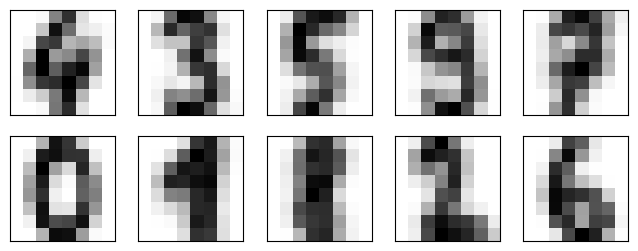

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = Kmeans.cluster_centers_.reshape(10, 8, 8) #Hago el reshape de 8x 8 para visualizar en forma de imagen
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

    #Los números son la media de los números, por eso se ven difuminados

Tal y como podemos observar, el K-means es capaz de encontrar los clusters cuyos centros son los números del 0 al 9, a excepción del 1 y el 8 que los confunde un poco.

Vamos a calcular algunas métricas intrínsecas y extrínsecas de las vistas en clase para comprobar cómo ha ido el clustering cuantitativamente.

In [9]:
from sklearn.metrics import cluster

In [10]:
print('Completness score =', cluster.completeness_score(digits.target, clusters))
print('Homogeneidad =', cluster.homogeneity_score(digits.target, clusters))
print('Información mutua (ajustada) =', cluster.adjusted_mutual_info_score (digits.target, clusters))

Completness score = 0.7514312243853245
Homogeneidad = 0.7423769268336259
Información mutua (ajustada) = 0.7443265633359026


Ya que tenemos las etiquetas reales, vamos a calcular el accuracy. Para ello, vamos a usar la función `accuracy_score` disponible en  `sklearn.metrics`.

Daos cuenta de que como hemos hablado en las clases, el k-means hace agrupamientos pero no tiene ni idea de a qué *clase* pertenece cada uno. Simplemente agrupa las imágenes por similitud, de forma parecida a lo que haría un *k nearest neighbours (kNN)* o algoritmo de vecinos cercanos.

Por ello, lo primero que vamos a hacer es asignarle a cada cluster la etiqueta de acuerdo a la moda de sus elementos. Es decir, nos fijaremos en qué elemento se repite más en cada cluster, y ese será la etiqueta.

In [11]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

<ipython-input-11-6ad35ad119db>:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


Y ahora ya podemos calcular el accuracy:

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Y también la matriz de confusión:

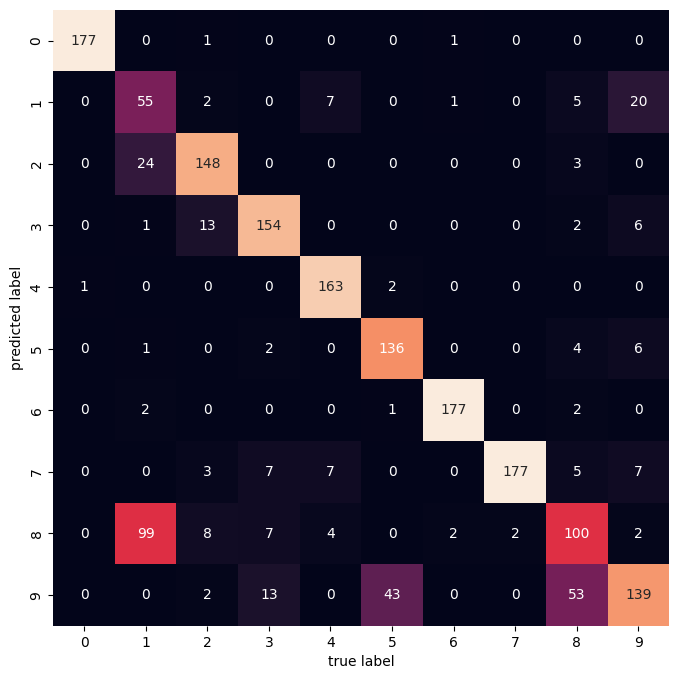

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Fijaos que hemos conseguido clasificar correctamente el 80% de nuestras imágenes con un simple K-means sin siquiera preprocesar los datos. Como hemos comprobado antes al plotear las imágenes, el algoritmo se confunde sobretodo con el 1 y el 8.

¿Y si realizásemos algún tipo de preprocesamiento que nos permitiese mejorar los resultados?

Vamos a ver qué pasaría si usásemos una técnica de reducción de dimensionalidad conocida como t-SNE (https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm):

In [16]:

from sklearn.manifold import TSNE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-5cce2b48d9f0>:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


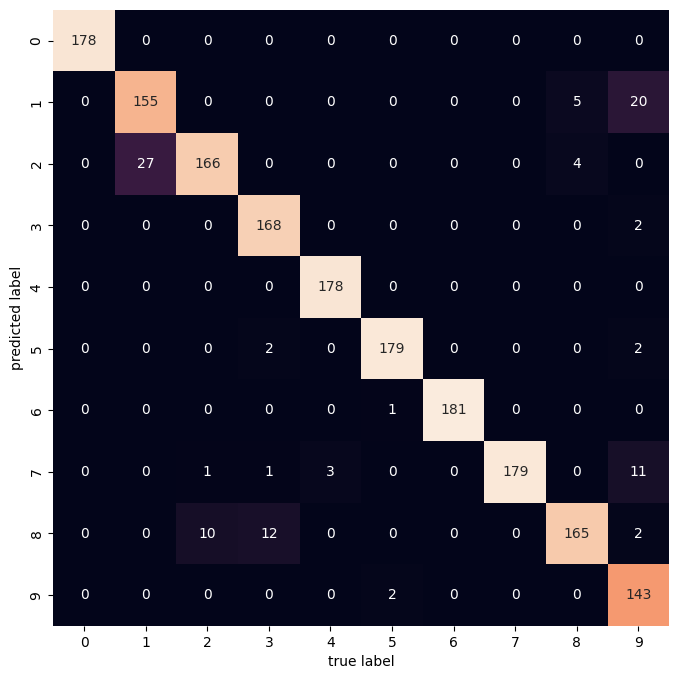

In [22]:
# Hacemos un preprocesamiento de los datos
# Utilizamos t-SNE(Pra reducir la dimensionalidad) para proyectar los datos en otro espacio de 2 dimensiones
# Este paso tarda unos segundos, no os impacientéis :)

tsne = TSNE(n_components=2, init='random', random_state=42)
digits_proj = tsne.fit_transform(digits.data)

# Realizamos el clustering

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits_proj)

# Asignamos las etiquetas de acuerdo a la moda
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Calculamos el accuracy
accuracy_score(digits.target, labels)

# Mostramos la matriz de confusión
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
accuracy_score(digits.target, labels)

0.9415692821368948

¿Qué os parece? Daos cuenta de la importancia de preprocesar los datos de una forma adecuada. Con esta simple decisión hemos mejorado en un 13% la precisión de nuestro algoritmo.

¡Que no se os olvide! ;)

El segundo ejemplo que vamos a ver trata sobre compresión de imágenes. Sí, aunque parezca mentira, se pueden usar técnicas de clustering para ello.

Simplemente reducimos el número total de colores utilizados para representar la imagen, y de esta forma permitimos que se necesiten menos memoria (bits) para su almacenaje.

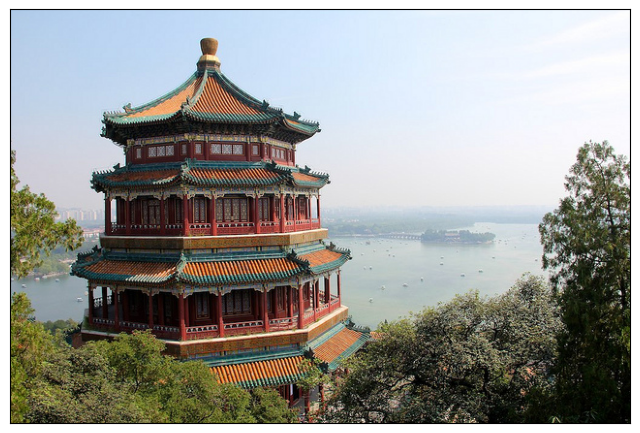

In [24]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

Recordad que las imagenes se representan como matrices de `(alto, ancho, canales)`, donde los valores de los canales son rojo/verde/azul y varían de 0 a 255.

In [25]:
china.shape

(427, 640, 3)

Sin embargo, podemos ver este dataset como una nube de puntos tridimensional, donde cada pixel es una instancia.

Vamos a normalizar los valores entre 0 y 1 y a convertirlos en `[n_instancias, 3]`.

In [26]:
china.max()

255

In [29]:
# normalizamos la imagen para que tenga valores entre 0 y 1
data = china / 255

#Como el kmeans no trabaja con imagenes, lo pasamos a vectores
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Ahora vamos a visualizar los pixels:

In [30]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

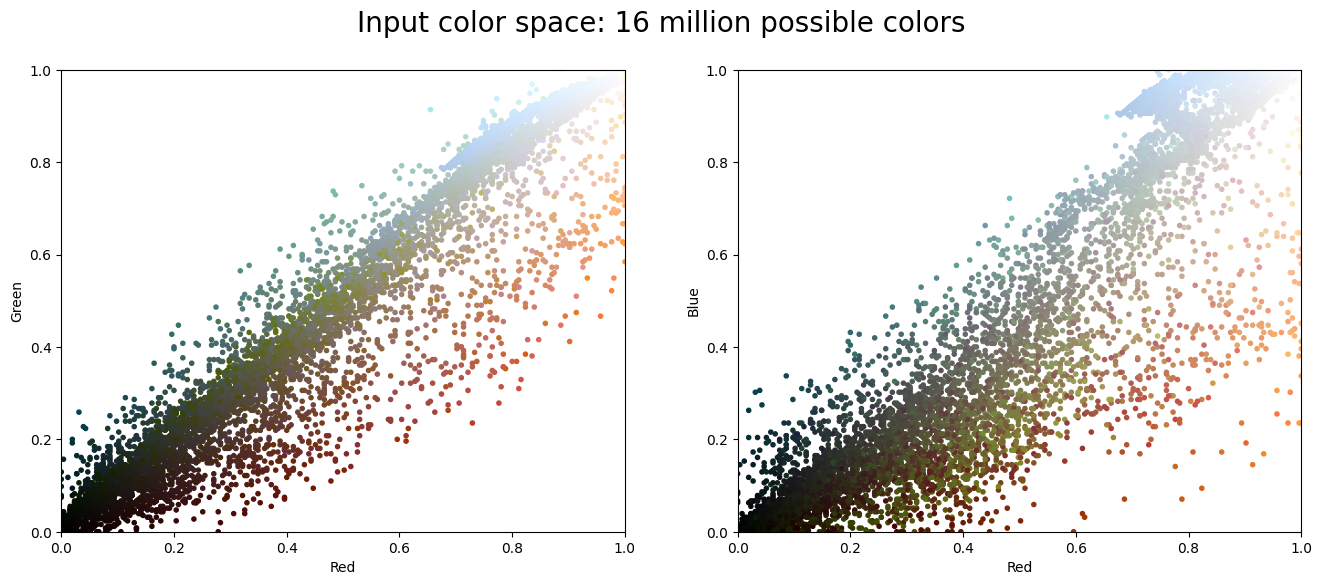

In [31]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Vamos ahora a reducir de 16 millones de colores a 16.

Como se trata de un dataset grande, vamos a usar una variación del k-means llamada mini-batch k-Means, que funciona exactamente igual que el k-means pero con mini-batches.



(273280, 3)


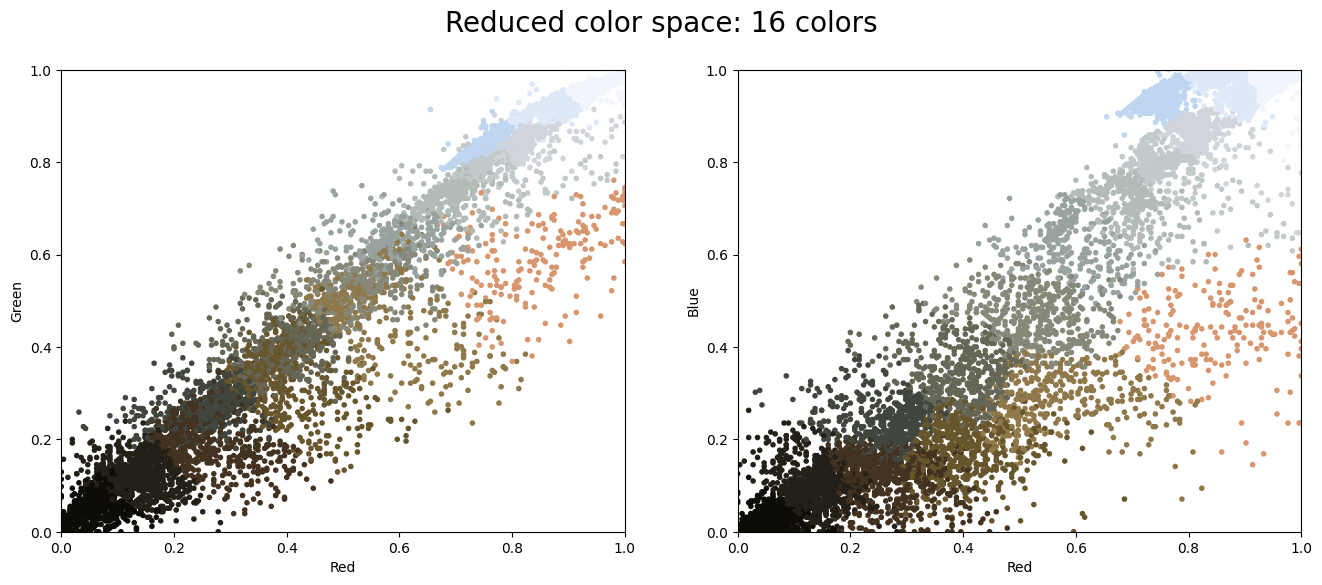

In [32]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
print(new_colors.shape)
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Perfecto. Acabamos de conseguir reducir el número de colores a 16, como podéis observar.

Vamos a transformar la imagen:

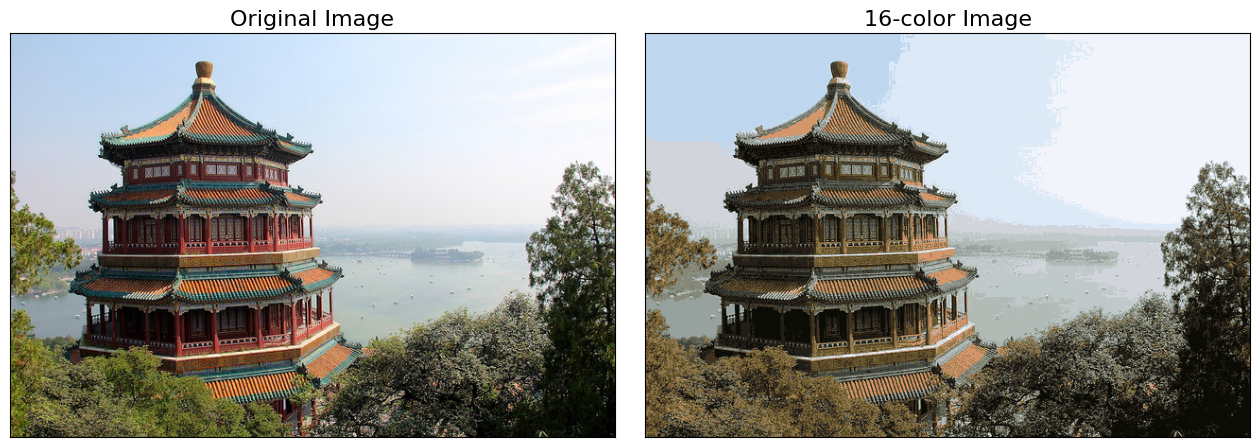

In [33]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

In [34]:
#Vamos a calcular el tamaño de cada imagen
# Ocupa aproximadamente 820 Kb (819976 bytes)
import sys
sys.getsizeof(china)

819984

In [35]:
sys.getsizeof(china_recolored)
# 136 bytes, no llega a 1Kb

144

Es indiscutible que se pierde calidad, pero pensad que acabamos de conseguir comprimir la imagen con un factor de más o menos 1 millón!

La fuente de estos ejemplos, para quien quiera consultarla: 

*   https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
*   https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
*   https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
